<h1>Exploratory data analysis of earthquake trends in nepal</h1>
<ul>
<li>Visualizing data, detecting outliers, plan for cleaning</li>
<li>Handling missing values , mean, median, mode</li>
<li>handling Imbalanced datasets</li>
<li>Testing the outliers</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('nsc_nepal_earthquakes_raw.csv')
df.head()
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1255 non-null   str    
 1   time_utc   1254 non-null   str    
 2   latitude   1255 non-null   str    
 3   longitude  1255 non-null   str    
 4   magnitude  1255 non-null   float64
 5   epicenter  1255 non-null   str    
dtypes: float64(1), str(5)
memory usage: 59.0 KB


In [3]:
df.isnull().sum()

date         0
time_utc     1
latitude     0
longitude    0
magnitude    0
epicenter    0
dtype: int64

In [4]:
#dropping the null values, here time_utc for earthquake is random event and cannot be related with any other attributes

cleaned_data = df.dropna() # finally, data has no missing values

In [5]:
cleaned_data.duplicated().sum()  #data has no duplicate values

np.int64(0)

<h2>Magnitude Analysis</h2>

In [6]:
df.describe()

,magnitude
count,1255.000000
mean,4.444781
std,0.501245
min,4.000000
25%,4.100000
50%,4.300000
75%,4.600000
max,7.600000


C:\Users\NIC\AppData\Local\Temp\ipykernel_11968\3654636814.py:16: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\NIC\OneDrive\Desktop\DataScience_Dump\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


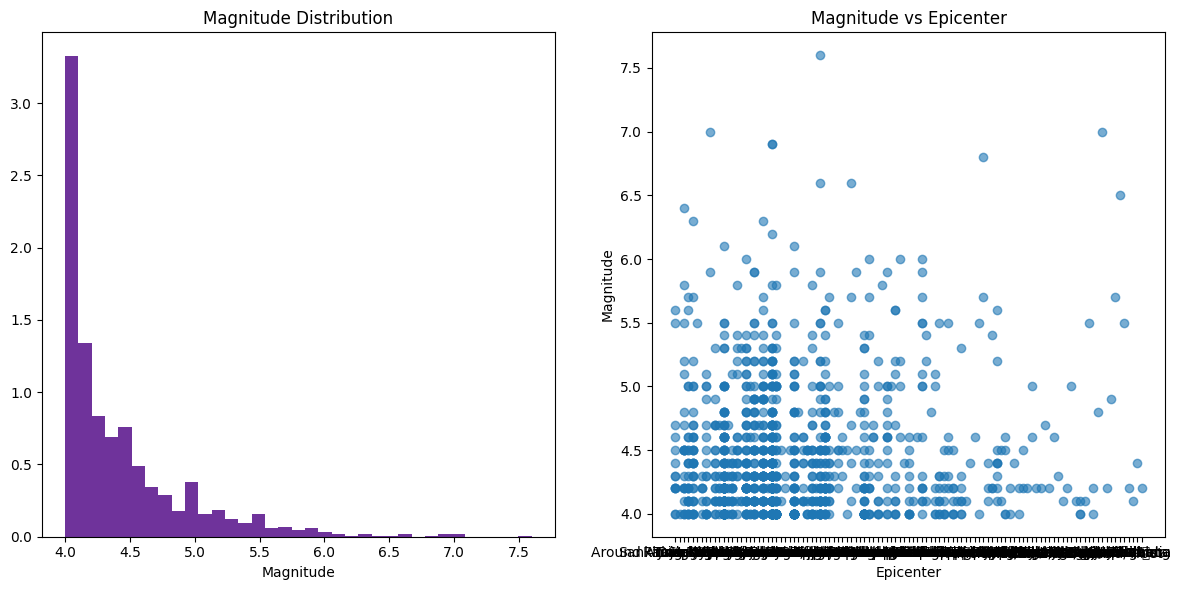

In [7]:
fig, (a1, a2) = plt.subplots(1, 2, figsize=(12,6))

# Histogram
a1.hist(df['magnitude'], bins=35, density=True,
        alpha=0.8, facecolor='indigo')
a1.set_xlabel("Magnitude")
a1.set_title("Magnitude Distribution")

# Scatter plot
a2.scatter(df['epicenter'], df['magnitude'],
           marker='o', alpha=0.6)
a2.set_xlabel("Epicenter")
a2.set_ylabel("Magnitude")
a2.set_title("Magnitude vs Epicenter")

plt.tight_layout()
plt.show()


<h4>Detecting Outliers</h4>

In [8]:
mean_magnitude = df['magnitude'].mean()
mode_magnitude = df['magnitude'].mode()
Q1 = df['magnitude'].quantile(0.25)
Q2 = df['magnitude'].median()
Q3 = df['magnitude'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Mean Magnitude: {mean_magnitude}')
print(f'Lower Bound: {lower_bound}\nUpper Bound: {upper_bound}\nIQR: {IQR}\nQ1: {Q1}\nQ2: {Q2}\nQ3: {Q3}')

Mean Magnitude: 4.444780876494024
Lower Bound: 3.3499999999999996
Upper Bound: 5.35
IQR: 0.5
Q1: 4.1
Q2: 4.3
Q3: 4.6


Text(0, 0.5, 'Magnitude')

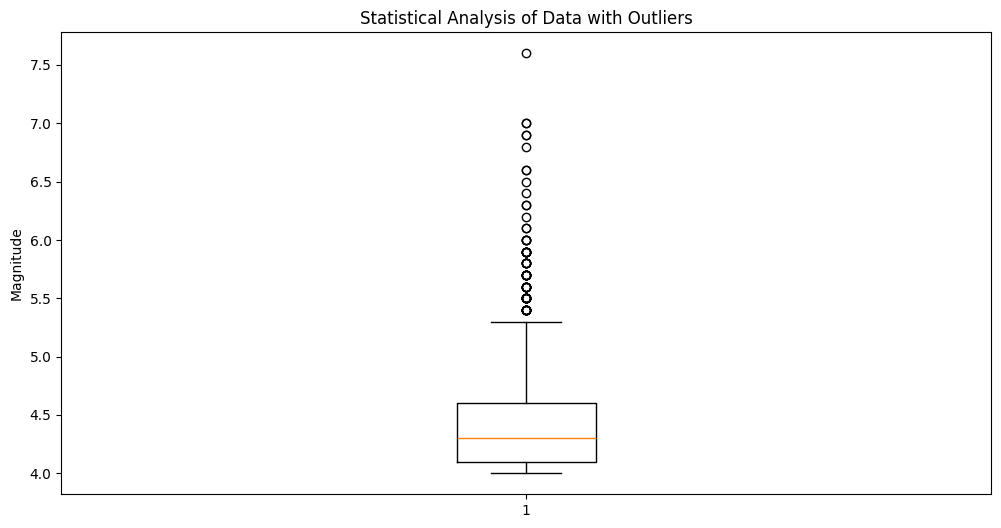

In [9]:
# Plotting the nature of data with the outliers
fig, (ax1) = plt.subplots(1,1, sharex=True, figsize=(12,6))
ax1.boxplot(df['magnitude'])
ax1.set_title("Statistical Analysis of Data with Outliers")
ax1.set_ylabel("Magnitude")

<h3>Geographical Analysis</h3>

In [10]:
# Converting strings to float
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Checking for any conversion issues
print(f"Missing latitudes: {df['latitude'].isna().sum()}")
print(f"Missing longitudes: {df['longitude'].isna().sum()}")

# Removing rows with invalid coordinates
df = df.dropna(subset=['latitude', 'longitude'])

Missing latitudes: 2
Missing longitudes: 2


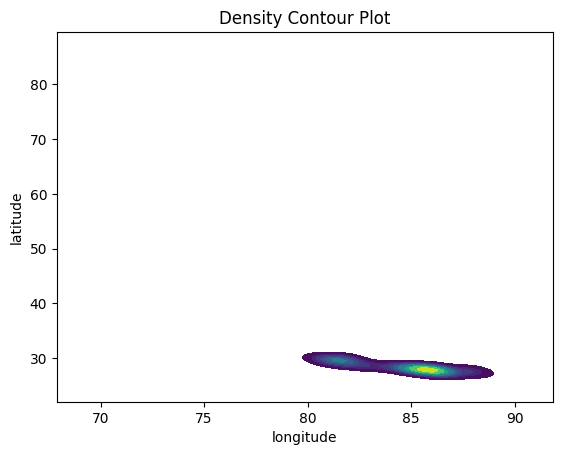

In [11]:
sns.kdeplot(x=df['longitude'].astype(float), 
            y=df['latitude'].astype(float), 
            cmap='viridis', fill=True, levels=10)
plt.title('Density Contour Plot')
plt.show()
